## Тема “Обучение без учителя” ##
**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [21]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
y = pd.DataFrame(boston.target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


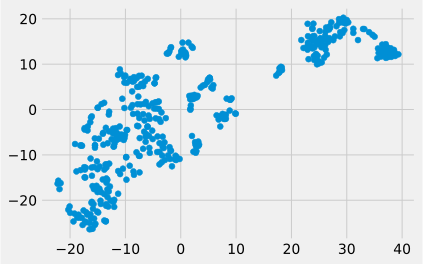

In [36]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.



In [30]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=2, max_iter = 100)

In [31]:
train_labels = model.fit_predict(X_train_scaled)

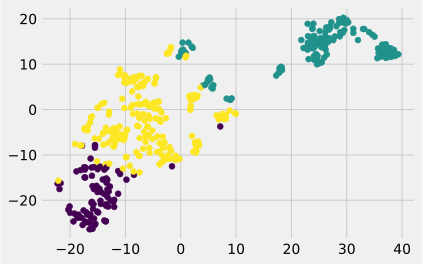

In [32]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

In [42]:
print("Cредние значения CRIM:")
print(f'Кластер 0: {X_train.loc[train_labels == 0, "CRIM"].mean()}')
print(f'Кластер 1: {X_train.loc[train_labels == 1, "CRIM"].mean()}')
print(f'Кластер 2: {X_train.loc[train_labels == 2, "CRIM"].mean()}')      

Cредние значения CRIM:
Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


In [47]:
print("Cредние значения price:")
print(f'Кластер 0: {y_train.loc[train_labels == 0, "price"].mean()}')
print(f'Кластер 1: {y_train.loc[train_labels == 1, "price"].mean()}')
print(f'Кластер 2: {y_train.loc[train_labels == 2, "price"].mean()}') 

Cредние значения price:
Кластер 0: 27.788372093023252
Кластер 1: 16.165354330708666
Кластер 2: 24.958115183246072


***Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

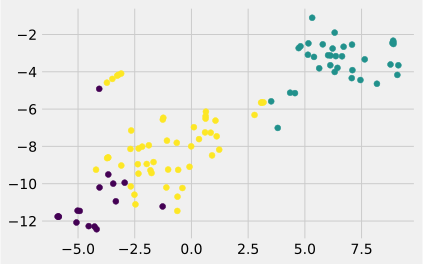

In [49]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

test_labels = model.predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)


In [50]:
print("Cредние значения CRIM:")
print(f'Кластер 0: {X_test.loc[test_labels == 0, "CRIM"].mean()}')
print(f'Кластер 1: {X_test.loc[test_labels == 1, "CRIM"].mean()}')
print(f'Кластер 2: {X_test.loc[test_labels == 2, "CRIM"].mean()}')     

Cредние значения CRIM:
Кластер 0: 0.062060000000000004
Кластер 1: 10.165531142857143
Кластер 2: 0.26607882352941176


In [51]:
print("Cредние значения price:")
print(f'Кластер 0: {y_test.loc[test_labels == 0, "price"].mean()}')
print(f'Кластер 1: {y_test.loc[test_labels == 1, "price"].mean()}')
print(f'Кластер 2: {y_test.loc[test_labels == 2, "price"].mean()}') 

Cредние значения price:
Кластер 0: 31.35
Кластер 1: 16.437142857142856
Кластер 2: 21.860784313725492
